# Travelling Salesman problem 

In [134]:
from __future__ import print_function
import tsplib95
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

## Load the Data

In [135]:
def loaddata(location):
    filedata = tsplib95.load(location)
    data = str(filedata)
    Csv_data = data.split(':')[-1] # Fetches the data after the last ':'
    Csv_data = Csv_data.split('EOF')[0] # Fetches the data before the first  'EOF'
    Csv_data = Csv_data.replace(" ", ",") #Replaces the empty space with ','
    Csv_data = io.StringIO(Csv_data) # io. StringIO is an in-memory file-like object that does do alterations to newlines
    return Csv_data

In [136]:
# Creating a list of co-ordinates
def getcordinates(dataframe):
    cordinate_list = []
    for index, row in dataframe.iterrows():
        cordinate_tuple = (row['Cordinate1'],row['Cordinate2'])
        cordinate_list.append(cordinate_tuple)
    return cordinate_list


## Exploring Djibouti TSP 

In [137]:
fileloc_dj = 'D:\DSTI\Metaheuristics\Exam\dj38.tsp'
csv_data = loaddata(fileloc_dj)

In [138]:
# Creating the dataframe
Colname = ['Node','Cordinate1','Cordinate2']
df_dj = pd.read_csv(csv_data, sep=",",names=Colname,header=None)


In [139]:
cordinate_list = getcordinates(df_dj)

In [140]:
"""Simple travelling salesman problem on a circuit board."""

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Locations in block units
    data['locations'] = cordinate_list  # yapf: disable
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = (int(
                    math.hypot((from_node[0] - to_node[0]),
                               (from_node[1] - to_node[1]))))
    return distances


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    global best_route
    print('Route Distance is: {}'.format(solution.ObjectiveValue()))
    #print('Solution is ',solution)
    index = routing.Start(0)
    plan_output = 'Route:\n'
    route_distance = 0
    best_route = []
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        best_route.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    
    plan_output += 'Route Distance is : {}m\n'.format(route_distance)
    

def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['locations']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)
    

    distance_matrix = compute_euclidean_distance_matrix(data['locations'])
    
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return distance_matrix[from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    #print(routing)
    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


if __name__ == '__main__':
    main()

Route Distance is: 6645
Route:
 0 -> 1 -> 3 -> 2 -> 4 -> 5 -> 6 -> 7 -> 8 -> 10 -> 11 -> 15 -> 16 -> 17 -> 18 -> 12 -> 14 -> 19 -> 22 -> 25 -> 24 -> 21 -> 23 -> 27 -> 26 -> 30 -> 35 -> 33 -> 32 -> 37 -> 36 -> 34 -> 31 -> 29 -> 28 -> 20 -> 13 -> 9 -> 0



<Figure size 720x720 with 0 Axes>

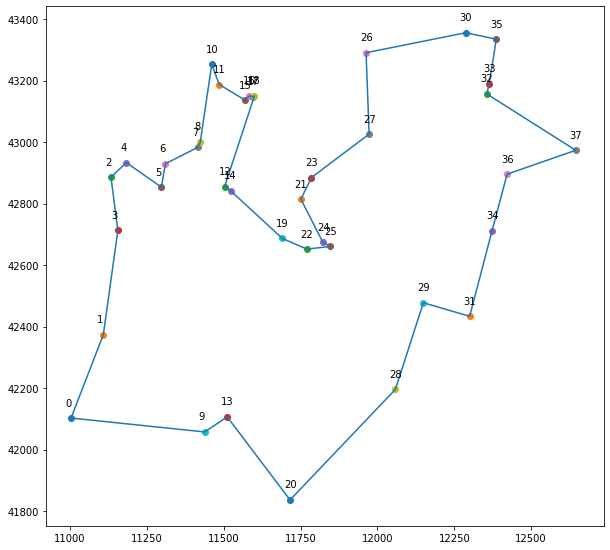

In [141]:
xlist = [df_dj.iloc[i,1] for i in best_route]
ylist = [df_dj.iloc[i,2] for i in best_route]

xlist.append(xlist[0])
#print(xlist)
ylist.append(ylist[0])
plt.figure(figsize=(10,10))
plt.figure(figsize=(10,10))
for idx,city in enumerate(df_dj.values):
    plt.scatter(city[1],city[2])
    plt.text(city[1]-20, city[2]+40, str(idx), fontsize=10)

plt.plot(xlist, ylist, linestyle='-')

#plt.plot(xlist, ylist, linestyle='-')
plt.axis('scaled')
plt.show()

## Exploring Qatar TSP 

In [126]:
fileloc_qtr = 'D:\DSTI\Metaheuristics\Exam\qa194.tsp'
csv_data_qtr = loaddata(fileloc_qtr)

In [127]:
# Creating the dataframe
Colname = ['Node','Cordinate1','Cordinate2']
df_qtr = pd.read_csv(csv_data_qtr, sep=",",names=Colname,header=None)


In [128]:
cordinate_list_qtr = getcordinates(df_qtr)

In [129]:
"""Simple travelling salesman problem on a circuit board."""

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Locations in block units
    data['locations'] = cordinate_list_qtr  # yapf: disable
    data['num_vehicles'] = 1
    data['depot'] = 0
    return data


def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = (int(
                    math.hypot((from_node[0] - to_node[0]),
                               (from_node[1] - to_node[1]))))
    return distances


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    global best_route
    print('Route Distance is: {}'.format(solution.ObjectiveValue()))
    #print('Solution is ',solution)
    index = routing.Start(0)
    plan_output = 'Route:\n'
    route_distance = 0
    best_route = []
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        best_route.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    
    plan_output += 'Route Distance is : {}m\n'.format(route_distance)


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['locations']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)
    

    distance_matrix = compute_euclidean_distance_matrix(data['locations'])
    
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return distance_matrix[from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
    #print(routing)
    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


if __name__ == '__main__':
    main()

Route Distance is: 9966
Route:
 0 -> 5 -> 7 -> 6 -> 10 -> 13 -> 16 -> 25 -> 23 -> 20 -> 17 -> 32 -> 27 -> 28 -> 21 -> 26 -> 36 -> 44 -> 56 -> 59 -> 63 -> 69 -> 76 -> 78 -> 80 -> 82 -> 87 -> 92 -> 95 -> 94 -> 91 -> 96 -> 107 -> 106 -> 104 -> 105 -> 117 -> 121 -> 130 -> 135 -> 154 -> 150 -> 146 -> 140 -> 151 -> 152 -> 156 -> 153 -> 149 -> 143 -> 138 -> 137 -> 141 -> 145 -> 148 -> 144 -> 139 -> 136 -> 133 -> 131 -> 126 -> 124 -> 125 -> 118 -> 113 -> 112 -> 108 -> 101 -> 102 -> 90 -> 77 -> 73 -> 68 -> 71 -> 74 -> 75 -> 86 -> 79 -> 70 -> 24 -> 22 -> 12 -> 15 -> 19 -> 64 -> 62 -> 35 -> 58 -> 61 -> 81 -> 100 -> 98 -> 93 -> 88 -> 89 -> 84 -> 85 -> 97 -> 103 -> 110 -> 129 -> 155 -> 160 -> 162 -> 163 -> 168 -> 175 -> 181 -> 171 -> 178 -> 173 -> 172 -> 174 -> 182 -> 185 -> 186 -> 193 -> 189 -> 191 -> 190 -> 188 -> 183 -> 176 -> 180 -> 187 -> 192 -> 184 -> 179 -> 177 -> 167 -> 164 -> 158 -> 157 -> 161 -> 166 -> 169 -> 170 -> 165 -> 159 -> 147 -> 142 -> 134 -> 128 -> 132 -> 127 -> 123 -> 122 -> 119

<Figure size 1800x1800 with 0 Axes>

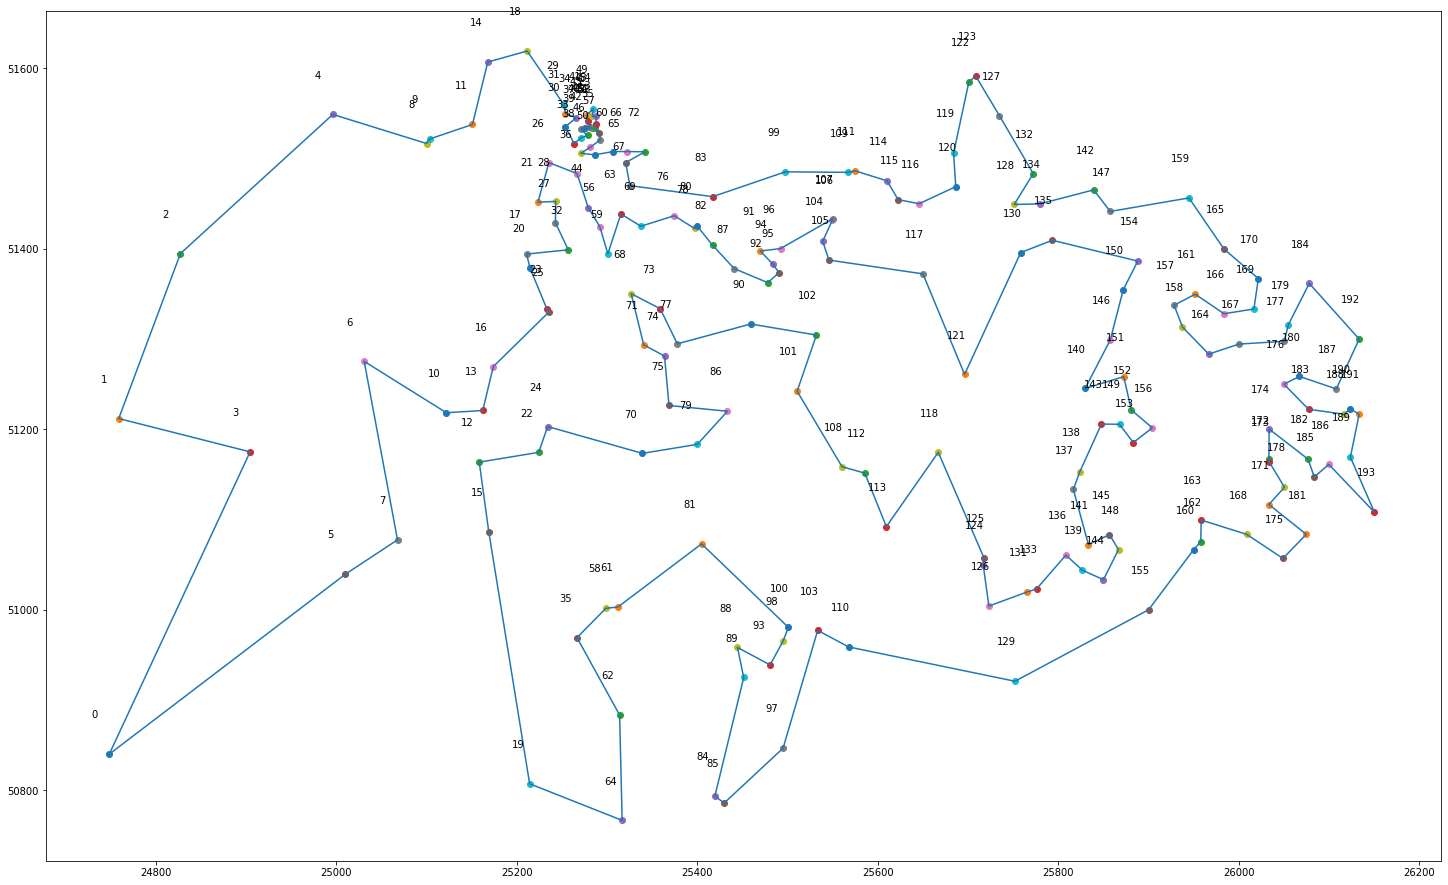

In [133]:
xlist = [df_qtr.iloc[i,1] for i in best_route]
ylist = [df_qtr.iloc[i,2] for i in best_route]

xlist.append(xlist[0])
#print(xlist)
ylist.append(ylist[0])
plt.figure(figsize=(25,25))
plt.figure(figsize=(25,25))
for idx,city in enumerate(df_qtr.values):
    plt.scatter(city[1],city[2])
    plt.text(city[1]-20, city[2]+40, str(idx), fontsize=10)

plt.plot(xlist, ylist, linestyle='-')

#plt.plot(xlist, ylist, linestyle='-')
plt.axis('scaled')
plt.show()